In [1]:
import numpy as np
import glob,os
import matplotlib
from matplotlib import pyplot as plt
import cv2
from PIL import Image

In [2]:
index_testImg = 79
index_trainImg = 319

In [3]:
def LoadTrain_dataset(numberTrainSetImg):
    path_trainSet = "trainset/s*/*.pgm"
    
    trainSet = glob.glob(path_trainSet)
    rowTrainSet = len(trainSet)
    phNameTrainSet = trainSet[numberTrainSetImg]
    
    imgTrainSet = np.array(Image.open(phNameTrainSet))
    imgTrainSetSize = imgTrainSet.shape
    columnsTrainSet = imgTrainSet.shape[0] * imgTrainSet.shape[1]
    
    print "Total train set", rowTrainSet
    print "Size tarin set IMG", imgTrainSetSize
    print "Image train set name:", phNameTrainSet
    
    return imgTrainSet, rowTrainSet, columnsTrainSet, imgTrainSetSize, trainSet 

Total train set 320
Size tarin set IMG (112, 92)
Image train set name: trainset/s36/7.pgm


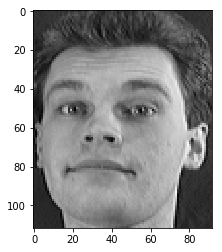

In [4]:
imgTrainSet, rowTrainSet, columnsTrainSet, imgTrainSetSize, trainSet = LoadTrain_dataset(index_trainImg)
plt.imshow(imgTrainSet, cmap='gray')

In [5]:
def LoadTest_dataset(numberTestSetImg):
    path_testSet  = "testset/s*/*.pgm" 
    
    testSet = glob.glob(path_testSet)
    rowTestSet = len(testSet)
    phNameTestSet = testSet[numberTestSetImg]   
    
    imgTestSet = np.array(Image.open(phNameTestSet))
    imgTestSetSize = imgTestSet.shape
    columnsTestSet = imgTrainSet.shape[0] * imgTrainSet.shape[1]
    
    print "Total test set", rowTestSet
    print "Size test set IMG", imgTestSetSize
    print "Image test set name:", phNameTestSet
    
    return imgTestSet, rowTestSet, columnsTestSet, imgTestSetSize, testSet 

Total test set 80
Size test set IMG (112, 92)
Image test set name: testset/s36/10.pgm


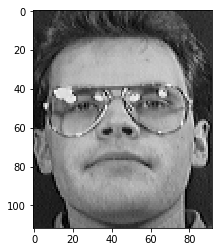

In [6]:
imgTestSet, rowTestSet, columnsTestSet, imgTestSetSize, testSet = LoadTest_dataset(index_testImg)
plt.imshow(imgTestSet, cmap='gray')

In [7]:
def BuildTrainMatrix(trainSet,rowsTrain,columnsTrain):
    countRowTrain = 0
    dataTrainMatrix = np.zeros((rowsTrain,columnsTrain))
    labelist = []
    for i in trainSet:
        npTrain = np.array(Image.open(i)) 
        dataTrainMatrix[countRowTrain,:] = npTrain.reshape(1,npTrain.shape[0] * npTrain.shape[1])
        countRowTrain += 1
        
        fname,ext = os.path.splitext(i)
        _,name,index, = fname.split('/',2)
        labelist.append(int(name[1:]))
        
    labelist=np.array(labelist).reshape(len(labelist),1)       
    return dataTrainMatrix, labelist

In [8]:
dataTrainMatrix,labeTrain = BuildTrainMatrix(trainSet,rowTrainSet,columnsTrainSet)
print "Data train form", dataTrainMatrix.shape
print "Labels", labeTrain.shape

Data train form (320, 10304)
Labels (320, 1)


In [9]:
def BuildTestMatrix(testSet,rowsTest,columnsTest):    
    countRowTest = 0
    dataTestMatrix = np.zeros((rowsTest,columnsTest))
    labelist = []
    for j in testSet:
        npTest = np.array(Image.open(j))
        dataTestMatrix[countRowTest,:] = npTest.reshape(1,npTest.shape[0]*npTest.shape[1])
        countRowTest += 1
        
        fname,ext = os.path.splitext(j)
        _,name,index, = fname.split('/',2)
        labelist.append(int(name[1:]))
        
    labelist=np.array(labelist).reshape(len(labelist),1)  
    return dataTestMatrix,labelist

In [10]:
dataTestMatrix, labeTest = BuildTestMatrix(testSet, rowTestSet,columnsTestSet)
print "Data test form", dataTestMatrix.shape
print "Labe", labeTest.shape

Data test form (80, 10304)
Labe (80, 1)


In [11]:
def MatrixToVector(dataSetMatrix, imgSize):
    return dataSetMatrix.reshape(imgSize)

In [12]:
testImageVector = MatrixToVector(dataTestMatrix[index_testImg], imgTestSetSize)
print testImageVector.shape
trainImageVector = MatrixToVector(dataTrainMatrix[index_trainImg], imgTestSetSize)

(112, 92)


In [13]:
def ShowImageInVector(imageVector, labeList, indexIMG):
    labe = "Labe " + str(np.squeeze(labeList)[indexIMG])
    plt.imshow(imageVector, cmap='gray')
    plt.title(labe)
    return None

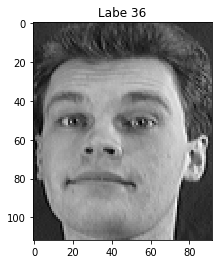

In [14]:

ShowImageInVector(trainImageVector, labeTrain, index_trainImg)

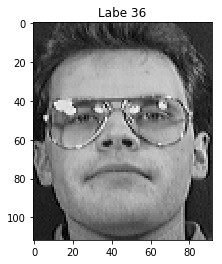

In [15]:
ShowImageInVector(testImageVector, labeTest, index_testImg)

In [16]:
def NormolizationData(data):
    return data/255

In [17]:
def EuclidDistance(test_img,train_img):
    return np.sqrt(np.sum((test_img - train_img)**2, axis=1))

In [18]:
def ModelIdent(test_img,test_lable,train_img,train_lable):
    predict_lable = np.zeros(test_lable.shape[0])
    result = np.zeros(test_lable.shape[0])
    for i in range(test_img.shape[0]):
        euclid_distance = EuclidDistance(test_img[i], train_img) 
        predict_lable[i] = train_lable[np.argsort(euclid_distance)[0]]
        result[i] = (predict_lable[i] == test_lable[i])
    return result

In [22]:
%%time

result = ModelIdent(dataTestMatrix,labeTest,dataTrainMatrix,labeTrain)
print "Accuracy of net's algorithm",result.mean() * 100,"%"     

Accuracy of net's algorithm 95.0 %
CPU times: user 930 ms, sys: 0 ns, total: 930 ms
Wall time: 930 ms


In [20]:
norm_test_img = NormolizationData(dataTestMatrix)
norm_train_img = NormolizationData(dataTrainMatrix)

In [23]:
%%time

result = ModelIdent(norm_test_img,labeTest,norm_train_img,labeTrain)
print "Accuracy of net's algorithm",result.mean() * 100,"%" 

Accuracy of net's algorithm 95.0 %
CPU times: user 941 ms, sys: 0 ns, total: 941 ms
Wall time: 940 ms
